In [1]:
import pandas as pd

In [2]:
# WRITE IN CURRENT LOCAL PATH TO listings_summary.csv

df = pd.read_csv(r'listings_summary.csv')
df.shape

(22552, 96)

In [3]:
columns = [
    'neighbourhood_group_cleansed',
    'room_type',
    'accommodates',
    'bathrooms',
    'bedrooms',
    'beds',
    'bed_type',
    'amenities',
    'price',
    'security_deposit',
    'cleaning_fee',
    'minimum_nights',
    'instant_bookable'         
]

df = df[columns]

In [4]:
df['bathrooms'] = df['bathrooms'].fillna(df['bathrooms'].mean()).astype(float)
df['bedrooms'] = df['bedrooms'].fillna(df['bedrooms'].mean()).astype(float)
df['beds'] = df['beds'].fillna(df['beds'].mean()).astype(float)
df['security_deposit'] = df['security_deposit'].fillna('$0.00')
df['cleaning_fee'] = df['cleaning_fee'].fillna('$0.00')

df['price'] = df['price'].str.replace('$', '').str.replace(',', '').astype(float)
df['security_deposit'] = df['security_deposit'].str.replace('$', '').str.replace(',', '').astype(float)
df['cleaning_fee'] = df['cleaning_fee'].str.replace('$', '').str.replace(',', '').astype(float)

df['neighborhood'] = df['neighbourhood_group_cleansed']
df = df.drop(columns=['neighbourhood_group_cleansed'])
df.isna().sum()

room_type           0
accommodates        0
bathrooms           0
bedrooms            0
beds                0
bed_type            0
amenities           0
price               0
security_deposit    0
cleaning_fee        0
minimum_nights      0
instant_bookable    0
neighborhood        0
dtype: int64

In [5]:
df['instant_bookable'] = df['instant_bookable'].replace({'t': 1, 'f': 0})
df['neighborhood'] = df['neighborhood'].str.replace('ö', 'o')
df.head(4)

,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,minimum_nights,instant_bookable,neighborhood
0,Entire home/apt,3,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,Gym,Heating,""Famil...",60.0,200.0,30.0,4,0,Mitte
1,Private room,2,1.0,1.0,1.0,Real Bed,"{Wifi,Kitchen,Elevator,Heating,Washer,Essentia...",17.0,0.0,0.0,2,0,Pankow
2,Entire home/apt,4,1.0,1.0,2.0,Real Bed,"{Internet,Wifi,Kitchen,""Buzzer/wireless interc...",90.0,200.0,50.0,62,1,Pankow
3,Private room,2,1.0,1.0,1.0,Pull-out Sofa,"{Internet,Wifi,""Pets allowed"",""Pets live on th...",26.0,250.0,30.0,5,0,Tempelhof - Schoneberg


In [6]:
df['amenities'] = df['amenities'].str.replace('{',"[")
df['amenities'] = df['amenities'].str.replace('}',"]")
df['amenities'] = df['amenities'].str.replace('"',"")
df['amenities'] = df['amenities'].apply(lambda x: x.lower())

df['wifi'] = df['amenities'].str.contains('wifi').astype(str)
df['wifi'] = df['wifi'].replace({'True': 1, 'False': 0})
df = df.drop(columns='amenities')


df.head()

,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,security_deposit,cleaning_fee,minimum_nights,instant_bookable,neighborhood,wifi
0,Entire home/apt,3,1.0,1.0,2.0,Real Bed,60.0,200.0,30.0,4,0,Mitte,1
1,Private room,2,1.0,1.0,1.0,Real Bed,17.0,0.0,0.0,2,0,Pankow,1
2,Entire home/apt,4,1.0,1.0,2.0,Real Bed,90.0,200.0,50.0,62,1,Pankow,1
3,Private room,2,1.0,1.0,1.0,Pull-out Sofa,26.0,250.0,30.0,5,0,Tempelhof - Schoneberg,1
4,Private room,2,1.0,1.0,2.0,Real Bed,42.0,0.0,0.0,2,0,Pankow,1


In [7]:
df.describe()

,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,minimum_nights,instant_bookable,wifi
count,22552.000000,22552.000000,22552.000000,22552.000000,22552.000000,22552.000000,22552.000000,22552.000000,22552.000000,22552.000000
mean,2.637460,1.092695,1.161134,1.620558,67.143668,118.284454,18.253991,7.157059,0.311901,0.954106
std,1.510548,0.329660,0.645898,1.173798,220.266210,304.232661,28.172816,40.665073,0.463280,0.209260
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,30.000000,0.000000,0.000000,2.000000,0.000000,1.000000
50%,2.000000,1.000000,1.000000,1.000000,45.000000,0.000000,10.000000,2.000000,0.000000,1.000000
75%,3.000000,1.000000,1.000000,2.000000,70.000000,150.000000,30.000000,4.000000,1.000000,1.000000
max,16.000000,8.500000,12.000000,22.000000,9000.000000,4280.000000,2000.000000,5000.000000,1.000000,1.000000


In [8]:
df['wifi'].value_counts()

1    21517
0     1035
Name: wifi, dtype: int64

In [9]:
# accomodates = [1, 2, 3, 4, 5, 6, 7, 8]
# bathrooms = [1.0, 1.5, 2.0]
# bedrooms = [0.0, 1.0, 2.0, 3.0]
# beds = [1.0, 2.0, 3.0, 4.0]
# bed_type = [Real Bed, Pull-out Sofa, Futon, Couch, Airbed]
# instant_bookable = [0, 1] <---boolean
# minimum_nights = [1, 2, 3, 4, 5, 6, 7]
# neighborhood = [Friedrichshain-Kreuzberg, Mitte, Pankow, Neukolln]
# room_type = [Private room, Entire home/apt, Shared room]
# wifi = [0, 1]  <---boolean

In [10]:
### The below filters were originally used

In [11]:
df = df[df['price'] <= 300]

In [12]:
df = df[df['minimum_nights'] <= 30]

In [13]:
df = df[df['accommodates'] <= 8]

In [14]:
df = df[df['beds'] <= 4]

In [15]:
df = df[df['bedrooms'] <= 3]

In [16]:
### The above filters were originally used

In [17]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\sarmen\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [18]:
import category_encoders as ce
encoder = ce.OrdinalEncoder(cols = [
    'neighborhood',
    'room_type',
    'bed_type'
    ])

X = df.drop(['price'], axis=1)
y = df['price']

X_encoded = encoder.fit_transform(X)

In [19]:
X_encoded

,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,security_deposit,cleaning_fee,minimum_nights,instant_bookable,neighborhood,wifi
0,1,3,1.0,1.0,2.0,1,200.0,30.0,4,0,1,1
1,2,2,1.0,1.0,1.0,1,0.0,0.0,2,0,2,1
3,2,2,1.0,1.0,1.0,2,250.0,30.0,5,0,3,1
4,2,2,1.0,1.0,2.0,1,0.0,0.0,2,0,2,1
7,2,2,1.0,1.0,2.0,1,0.0,0.0,30,0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
22547,1,2,1.0,1.0,1.0,1,0.0,0.0,2,0,1,1
22548,3,6,1.0,1.0,4.0,1,0.0,0.0,1,1,3,1
22549,1,2,1.0,0.0,1.0,1,0.0,0.0,3,0,2,1
22550,2,2,1.0,1.0,1.0,1,0.0,0.0,1,0,1,1


In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.25)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((15667, 12), (5223, 12), (15667,), (5223,))

In [21]:
X_test.head()

,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,security_deposit,cleaning_fee,minimum_nights,instant_bookable,neighborhood,wifi
22182,1,4,1.0,2.0,2.0,1,0.0,0.0,1,0,4,1
15573,2,3,1.0,1.0,2.0,1,0.0,0.0,2,1,5,1
7774,1,4,1.0,2.0,4.0,1,0.0,0.0,1,0,1,1
1683,2,2,1.0,1.0,1.0,1,0.0,14.0,5,1,3,1
21197,2,2,1.0,1.0,1.0,1,0.0,0.0,1,1,5,1


In [23]:
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestClassifier

# untuned random forest classifier result = 21.564043653072947 MAE

# tuned, unfiltered random forest classifier result = 28.326179496275277 MAE

rfc = RandomForestClassifier(random_state=42)


rfc.fit(X_train, y_train)
preds = rfc.predict(X_test)
mean_absolute_error(preds, y_test)

21.464484013019337

In [24]:
rfc.feature_importances_

array([0.01939683, 0.06079145, 0.04373099, 0.04344373, 0.05408324,
       0.02173802, 0.12986034, 0.1732162 , 0.19501298, 0.05145492,
       0.18820697, 0.01906433])

In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
# parameters to cycle through for GridSearchCV

params = {
#     'n_estimators': [200, 500],
    'n_estimators': [200, 400],
#     'max_features': ['auto', 'sqrt'],
    'max_features': ['auto'],
    'max_depth' : [4,5,6,7,8,15,20,25],
    'criterion' :['gini', 'entropy']
}

In [26]:
grid_rfc = GridSearchCV(estimator = rfc,
                        param_grid = params,
                        scoring = 'accuracy', 
                        cv = 5, 
                        verbose = 1)

In [28]:
%%time

# loop through predefined hyperparameters and fit your
# estimator (model) on your training set. So, in the end,
# you can select the best parameters from the listed
# hyperparameters. **18.5 minutes on last run**

grid_rfc.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


c:\users\sarmen\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Wall time: 22min 14s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 15, 20, 25],
                         'max_features': ['auto'], 'n_estimators': [200, 400]},
             scoring='accuracy', verbose=1)

In [39]:
# # result = RandomForestClassifier(max_depth=8, n_estimators=400, random_state=42)

print(grid_rfc.best_estimator_)

RandomForestClassifier(max_depth=8, n_estimators=200, random_state=42)


In [40]:
# # result = 0.09668772735975494

print(grid_rfc.score(X_test, y_test))

0.09666548421426037


In [27]:
rfc = RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=400,
                       random_state=42)

In [30]:
%%time

# with 200 n_estimators = 17.666475205820408 MAE

# with 400 n_estimators = 17.630480566724106 MAE

# unfiltered, with 200 n_estimators = 22.33079106065981 MAE

# unfiltered, with 400 n_estimators = 22.263568641362184 MAE

rfc.fit(X_train, y_train)
preds = rfc.predict(X_test)
print(f'€{mean_absolute_error(preds, y_test)}')

€17.630480566724106
Wall time: 9.36 s


In [31]:
# with 200 n_estimators

# array([0.16266006, 0.13879341, 0.03295924, 0.06012943, 0.06496402,
#        0.00377635, 0.08642557, 0.17540102, 0.10664776, 0.04840562,
#        0.11394447, 0.00589304]) 

# with 400 n_estimators

# array([0.16518969, 0.13275899, 0.03213856, 0.05621115, 0.06739702,
#        0.00351863, 0.08727281, 0.18005061, 0.10840799, 0.04905788,
#        0.11138423, 0.00661244])

rfc.feature_importances_

array([0.15418239, 0.14347492, 0.04268815, 0.06866164, 0.07954043,
       0.0034301 , 0.08189311, 0.16799552, 0.10480559, 0.04739989,
       0.10058697, 0.00534129])

In [ ]:
pip install yellowbrick --user

In [32]:
from yellowbrick.datasets import load_occupancy
from yellowbrick.model_selection import FeatureImportances

In [33]:
viz = FeatureImportances(rfc)

c:\users\sarmen\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


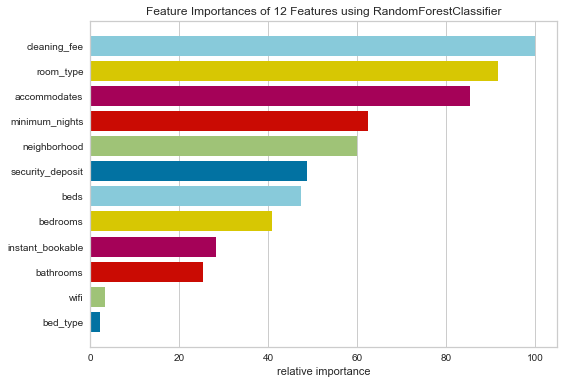

In [34]:
viz.fit(X_train, y_train)
viz.show()

In [ ]:
%%time
import pickle

filename = 'model.pkl'
f = open(filename, 'wb')
pickle.dump(rfc, f)

In [ ]:
%%time
f.close()

In [ ]:
# %%time

# ###SINGLE CELL SCRIPT###

# ###SINGLE CELL SCRIPT###

# ###SINGLE CELL SCRIPT###

# ###SINGLE CELL SCRIPT###

# import pandas as pd
# import category_encoders as ce
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_absolute_error
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import GridSearchCV
# from yellowbrick.datasets import load_occupancy
# from yellowbrick.model_selection import FeatureImportances
# import pickle


# df = pd.read_csv(r'E:\Desktop\Lambda_School\Group Projects\Unit 4 Sprint 4 Build Week AirBnB\listings_summary.csv')

# columns = [
#     'neighbourhood_group_cleansed',
#     'room_type',
#     'accommodates',
#     'bathrooms',
#     'bedrooms',
#     'beds',
#     'bed_type',
#     'amenities',
#     'price',
#     'security_deposit',
#     'cleaning_fee',
#     'minimum_nights',
#     'instant_bookable'         
# ]

# df = df[columns]

# df['bathrooms'] = df['bathrooms'].fillna(df['bathrooms'].mean()).astype(float)
# df['bedrooms'] = df['bedrooms'].fillna(df['bedrooms'].mean()).astype(float)
# df['beds'] = df['beds'].fillna(df['beds'].mean()).astype(float)
# df['security_deposit'] = df['security_deposit'].fillna('$0.00')
# df['cleaning_fee'] = df['cleaning_fee'].fillna('$0.00')

# df['price'] = df['price'].str.replace('$', '').str.replace(',', '').astype(float)
# df['security_deposit'] = df['security_deposit'].str.replace('$', '').str.replace(',', '').astype(float)
# df['cleaning_fee'] = df['cleaning_fee'].str.replace('$', '').str.replace(',', '').astype(float)

# df['neighborhood'] = df['neighbourhood_group_cleansed']
# df = df.drop(columns=['neighbourhood_group_cleansed'])

# df['instant_bookable'] = df['instant_bookable'].replace({'t': 1, 'f': 0})
# df['neighborhood'] = df['neighborhood'].str.replace('ö', 'o')

# df['amenities'] = df['amenities'].str.replace('{',"[")
# df['amenities'] = df['amenities'].str.replace('}',"]")
# df['amenities'] = df['amenities'].str.replace('"',"")
# df['amenities'] = df['amenities'].apply(lambda x: x.lower())

# df['wifi'] = df['amenities'].str.contains('wifi').astype(str)
# df['wifi'] = df['wifi'].replace({'True': 1, 'False': 0})
# df = df.drop(columns='amenities')

# encoder = ce.OrdinalEncoder(cols = [
#     'neighborhood',
#     'room_type',
#     'bed_type'
#     ])

# X = df.drop(['price'], axis=1)
# y = df['price']

# X_encoded = encoder.fit_transform(X)

# X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.25)

# X_train.shape, X_test.shape, y_train.shape, y_test.shape

# rfc = RandomForestClassifier(random_state=42)


# rfc.fit(X_train, y_train)
# preds = rfc.predict(X_test)
# mean_absolute_error(preds, y_test)

# params = {
# #     'n_estimators': [200, 500],
#     'n_estimators': [200, 400],
# #     'max_features': ['auto', 'sqrt'],
#     'max_features': ['auto'],
#     'max_depth' : [4,5,6,7,8,15,20,25],
#     'criterion' :['gini', 'entropy']
# }

# grid_rfc = GridSearchCV(estimator = rfc,
#                         param_grid = params,
#                         scoring = 'accuracy', 
#                         cv = 5, 
#                         verbose = 1)

# grid_rfc.fit(X_train, y_train)

# rfc = RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=400,
#                        random_state=42)

# rfc.fit(X_train, y_train)


# filename = 'model.pkl'
# f = open(filename, 'wb')
# pickle.dump(rfc, f)

# f.close()

# ###SINGLE CELL SCRIPT###

# ###SINGLE CELL SCRIPT###

# ###SINGLE CELL SCRIPT###

# ###SINGLE CELL SCRIPT###